What is Encoding?

Encoding is the process of converting categorical or text data into numbers so that machine learning algorithms can process it.

Why needed: Most ML algorithms (like linear regression, decision trees, neural networks) cannot work directly with text or categorical data.

Example: Converting colors ["Red", "Green", "Blue"] into numbers [0, 1, 2].

A. Label Encoding (Integer Encoding)

Each unique category is assigned a unique integer.

Useful for ordinal data (where order matters, like "Low", "Medium", "High").

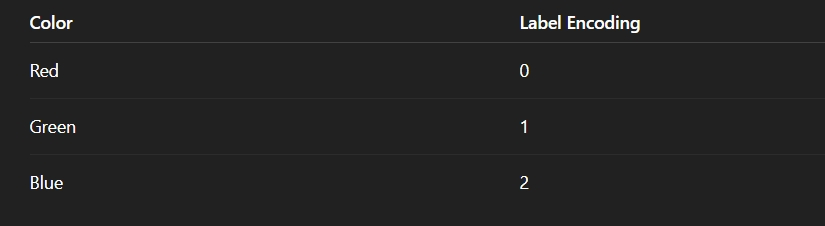

In [4]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/en1.jpeg"))


In [1]:
from sklearn.preprocessing import LabelEncoder

colors = ["Red", "Green", "Blue", "Green"]
le = LabelEncoder()
encoded = le.fit_transform(colors)
print(encoded)  # Output: [2 1 0 1]

[2 1 0 1]


Why assign categories to numbers?

Most machine learning algorithms cannot work directly with text or labels; they only understand numbers.

For example:

Suppose you have a feature Color = ["Red", "Green", "Blue"].

A computer can’t do math with "Red" or "Green".

Algorithms like linear regression, SVM, neural networks, KNN require numeric inputs.

So, we convert categories to numbers so algorithms can process them.

What is One-Hot Encoding?

One-Hot Encoding (OHE) is a technique to convert categorical variables into numerical form suitable for machine learning.

How it works:
For each category in a feature, OHE creates a new binary column:

1 if the row belongs to that category

0 otherwise

In [20]:
import pandas as pd

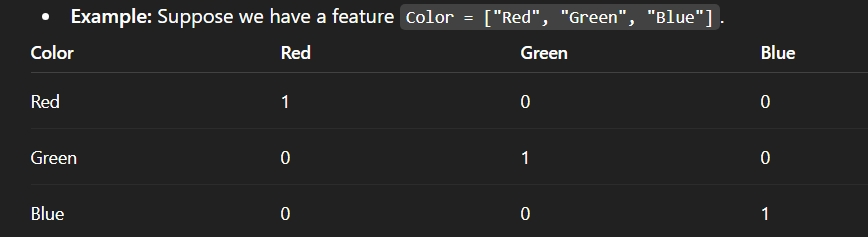

In [3]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/en2.jpeg"))


exmaple

Works, but problem:

The algorithm may think 3 > 2 > 1 > 0 has some meaningful order.

For nominal categories like color, this order does not exist, so it can mislead models like linear regression, logistic regression, neural networks.

One-Hot Encoding (Mathematical Explanation)

Idea: Convert each category into a binary vector.

If we have 4 unique colors → we make 4 new columns

Each row has 1 in the column of its color, 0 in others

Step-by-step numeric example

Let colors = {Red, Blue, Green, Yellow}

Red → [1, 0, 0, 0]

Blue → [0, 1, 0, 0]

Green → [0, 0, 1, 0]

Yellow → [0, 0, 0, 1]

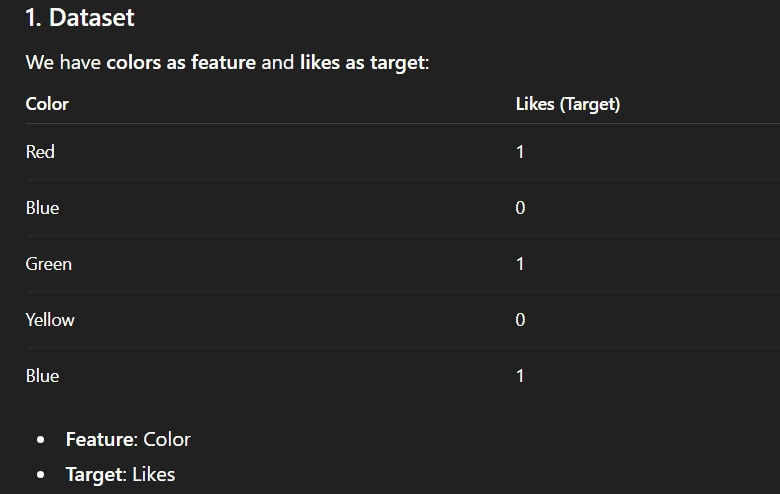

In [25]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/enc3.jpeg"))


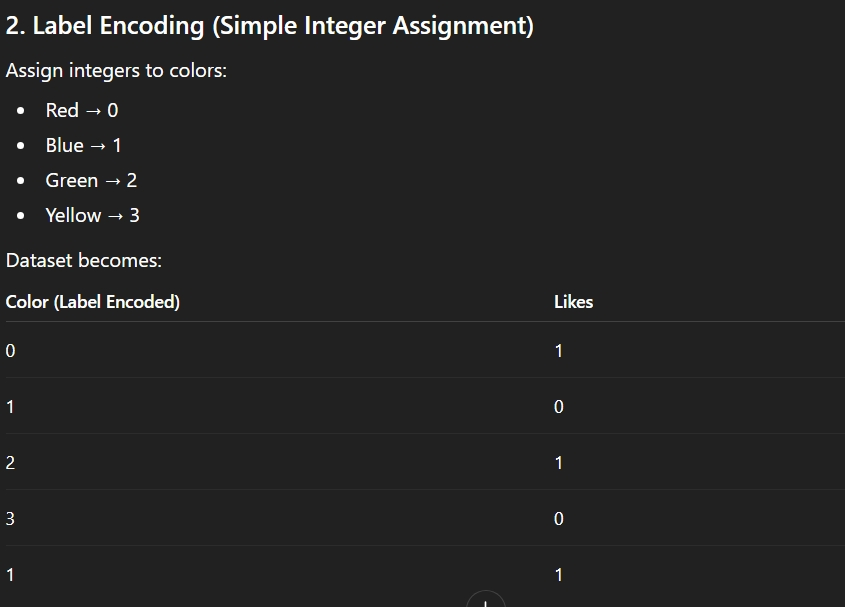

In [26]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/en4.jpeg"))


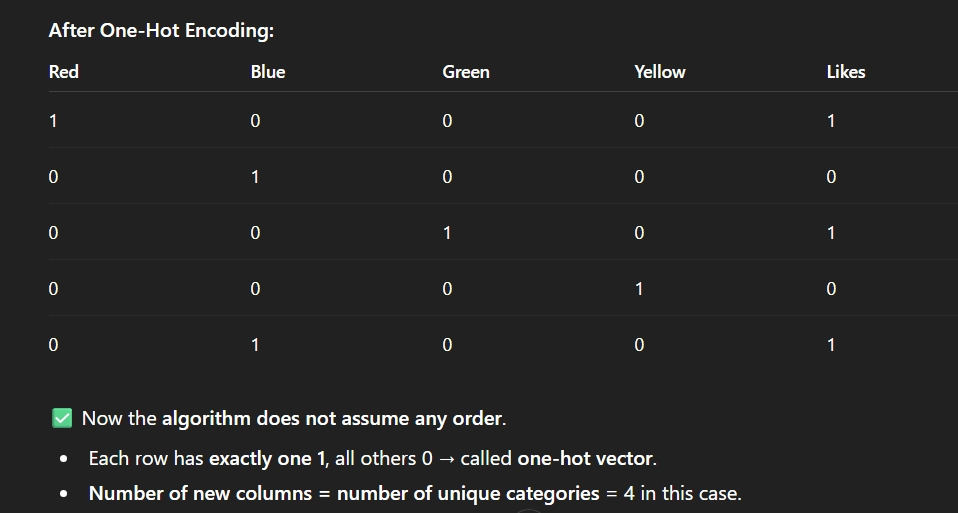

In [28]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/en6.jpeg"))


In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Original dataset
data = {
    'Color': ['Yellow', 'Blue', 'Green', 'Yellow', 'Blue'],
    'Likes': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
print("Original Data:")
df


Original Data:


,Color,Likes
0,Yellow,1
1,Blue,0
2,Green,1
3,Yellow,0
4,Blue,1


In [39]:
 # Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,drop="first")  # sparse=False returns a numpy array instead of sparse matrix

# Fit and transform the 'Color' column
color_encoded = ohe.fit_transform(df[['Color']])

color_encoded

array([[0., 1.],
       [0., 0.],
       [1., 0.]])

In [34]:
# Get the new column names
column_names = ohe.get_feature_names_out(['Color'])
column_names

array(['Color_Blue', 'Color_Green', 'Color_Yellow'], dtype=object)

In [35]:
# Create a new DataFrame for one-hot encoded colors
df_color_encoded = pd.DataFrame(color_encoded, columns=column_names)
df_color_encoded

,Color_Blue,Color_Green,Color_Yellow
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [36]:
# Concatenate with the target column
df_final = pd.concat([df_color_encoded, df['Likes']], axis=1)

print("\nOne-Hot Encoded Data using sklearn:")
print(df_final)


One-Hot Encoded Data using sklearn:
   Color_Blue  Color_Green  Color_Yellow  Likes
0         0.0          0.0           1.0      1
1         1.0          0.0           0.0      0
2         0.0          1.0           0.0      1
3         0.0          0.0           1.0      0
4         1.0          0.0           0.0      1


What is a Dummy Variable Trap?

When you one-hot encode a categorical variable, you create binary columns for each category.

Problem: If you include all columns, one column can be perfectly predicted from the others.

This causes multicollinearity, meaning features are linearly dependent, which can confuse algorithms like linear regression.

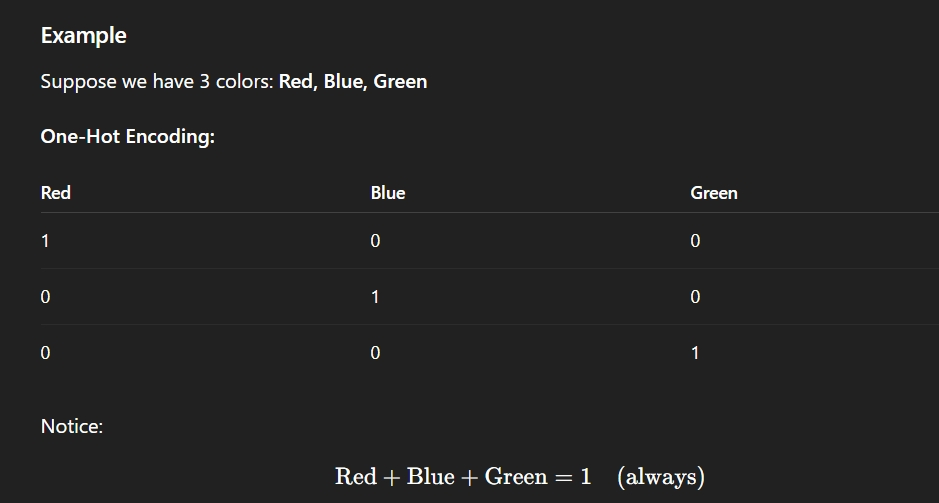

In [37]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/en7.jpeg"))


This means one column is redundant.

If you know Red = 0 and Blue = 0, you automatically know Green = 1.

Including all columns in linear regression creates multicollinearity → coefficients become unstable.

In [38]:
import pandas as pd
# names of new columns
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green']})
df_onehot = pd.get_dummies(df, columns=['Color'])
print(df_onehot)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False


Unique categories = 600

Without dropping → 600 columns

With drop_first=True → 599 columns

In [15]:
# Load Dataset
titanic = pd.read_csv("Titanic-Dataset.csv")  # change path if needed

titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
categorical_cols = ['Sex', 'Embarked', 'Cabin']
titanic[categorical_cols].head()

,Sex,Embarked,Cabin
0,male,S,NaN
1,female,C,C85
2,female,S,NaN
3,female,S,C123
4,male,S,NaN


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid dummy variable trap

In [18]:
# Fit and transform categorical columns
encoded_array = encoder.fit_transform(titanic[categorical_cols])

In [19]:
# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

In [21]:
# Combine with numeric columns
numeric_cols = titanic.select_dtypes(exclude=['object']).columns  # numeric columns only
titanic_final = pd.concat([titanic[numeric_cols], encoded_df], axis=1)

In [22]:
# Display final dataset
titanic_final.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
print("Original shape:", titanic.shape)
print("Final shape after One-Hot Encoding:", titanic_final.shape)

Original shape: (891, 12)
Final shape after One-Hot Encoding: (891, 158)
